In [44]:
!pip install pca


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [46]:
sns.set_theme(style='darkgrid')
plt.rcParams['figure.figsize'] = (7,5)

In [47]:
from google.colab import files

uploaded = files.upload()

Saving parkinsons_updrs.csv to parkinsons_updrs (1).csv


In [48]:
df = pd.read_csv('parkinsons_updrs.csv')
print(df.head())

   subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0         1   72    0     5.6431       28.199       34.398    0.00662   
1         1   72    0    12.6660       28.447       34.894    0.00300   
2         1   72    0    19.6810       28.695       35.389    0.00481   
3         1   72    0    25.6470       28.905       35.810    0.00528   
4         1   72    0    33.6420       29.187       36.375    0.00335   

   Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
0     0.000034     0.00401      0.00317  ...        0.230       0.01438   
1     0.000017     0.00132      0.00150  ...        0.179       0.00994   
2     0.000025     0.00205      0.00208  ...        0.181       0.00734   
3     0.000027     0.00191      0.00264  ...        0.327       0.01106   
4     0.000020     0.00093      0.00130  ...        0.176       0.00679   

   Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
0       0.01309        0.01662      

In [49]:

abbreviations = {
    "Jitter(%)": "Frequency variation (%)",
    "Jitter(Abs)": "Absolute Jitter (s)",
    "Jitter:RAP": "Relative Average Perturbation",
    "Jitter:PPQ5": "Five-point Period Perturbation Quotient",
    "Jitter:DDP": "Difference of Differences of Periods",
    "Shimmer": "Amplitude variation",
    "Shimmer(dB)": "Amplitude variation (dB)",
    "Shimmer:APQ3": "Three-point Amplitude Perturbation Quotient",
    "Shimmer:APQ5": "Five-point Amplitude Perturbation Quotient",
    "Shimmer:APQ11": "Eleven-point Amplitude Perturbation Quotient",
    "Shimmer:DDA": "Average absolute difference between successive amplitude variations",
    "NHR": "Noise to Harmonics Ratio",
    "HNR": "Harmonics to Noise Ratio",
    "RPDE": "Recurrence Period Density Entropy",
    "DFA": "Detrended Fluctuation Analysis",
    "PPE": "Pitch Period Entropy",
    "motor_UPDRS": "Motor score (target)",
    "total_UPDRS": "Total UPDRS score"
}
pd.DataFrame.from_dict(abbreviations, orient='index', columns=['Abbreviations'])


Abbreviations
Jitter(%)                                Frequency variation (%)
Jitter(Abs)                                  Absolute Jitter (s)
Jitter:RAP                         Relative Average Perturbation
Jitter:PPQ5              Five-point Period Perturbation Quotient
Jitter:DDP                  Difference of Differences of Periods
Shimmer                                      Amplitude variation
Shimmer(dB)                             Amplitude variation (dB)
Shimmer:APQ3         Three-point Amplitude Perturbation Quotient
Shimmer:APQ5          Five-point Amplitude Perturbation Quotient
Shimmer:APQ11       Eleven-point Amplitude Perturbation Quotient
Shimmer:DDA    Average absolute difference between successive...
NHR                                     Noise to Harmonics Ratio
HNR                                     Harmonics to Noise Ratio
RPDE                           Recurrence Period Density Entropy
DFA                               Detrended Fluctuation Analysis
PPE                                         Pitch Period Entropy
motor_UPDRS                                 Motor score (target)
total_UPDRS                                    Total UPDRS score

In [50]:
df.head()

subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0         1   72    0     5.6431       28.199       34.398    0.00662   
1         1   72    0    12.6660       28.447       34.894    0.00300   
2         1   72    0    19.6810       28.695       35.389    0.00481   
3         1   72    0    25.6470       28.905       35.810    0.00528   
4         1   72    0    33.6420       29.187       36.375    0.00335   

   Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
0     0.000034     0.00401      0.00317  ...        0.230       0.01438   
1     0.000017     0.00132      0.00150  ...        0.179       0.00994   
2     0.000025     0.00205      0.00208  ...        0.181       0.00734   
3     0.000027     0.00191      0.00264  ...        0.327       0.01106   
4     0.000020     0.00093      0.00130  ...        0.176       0.00679   

   Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
0       0.01309        0.01662      0.04314  0.014290  21.640  0.41888   
1       0.01072        0.01689      0.02982  0.011112  27.183  0.43493   
2       0.00844        0.01458      0.02202  0.020220  23.047  0.46222   
3       0.01265        0.01963      0.03317  0.027837  24.445  0.48730   
4       0.00929        0.01819      0.02036  0.011625  26.126  0.47188   

       DFA      PPE  
0  0.54842  0.16006  
1  0.56477  0.10810  
2  0.54405  0.21014  
3  0.57794  0.33277  
4  0.56122  0.19361  

[5 rows x 22 columns]

In [51]:

X = df.drop(columns=["subject#", "age", "sex", "test_time"], errors='ignore')
print("First 10 rows of feature data:")
print(X.head(10))
print("\nFeature Summary Statistics:")
print(X.describe().T)


First 10 rows of feature data:
   motor_UPDRS  total_UPDRS  Jitter(%)  Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  \
0       28.199       34.398    0.00662     0.000034     0.00401      0.00317   
1       28.447       34.894    0.00300     0.000017     0.00132      0.00150   
2       28.695       35.389    0.00481     0.000025     0.00205      0.00208   
3       28.905       35.810    0.00528     0.000027     0.00191      0.00264   
4       29.187       36.375    0.00335     0.000020     0.00093      0.00130   
5       29.435       36.870    0.00353     0.000023     0.00119      0.00159   
6       29.682       37.363    0.00422     0.000024     0.00212      0.00221   
7       29.928       37.857    0.00476     0.000025     0.00226      0.00259   
8       30.177       38.353    0.00432     0.000029     0.00156      0.00207   
9       30.424       38.849    0.00496     0.000027     0.00258      0.00253   

   Jitter:DDP  Shimmer  Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  \
0     0.01204  0.0256

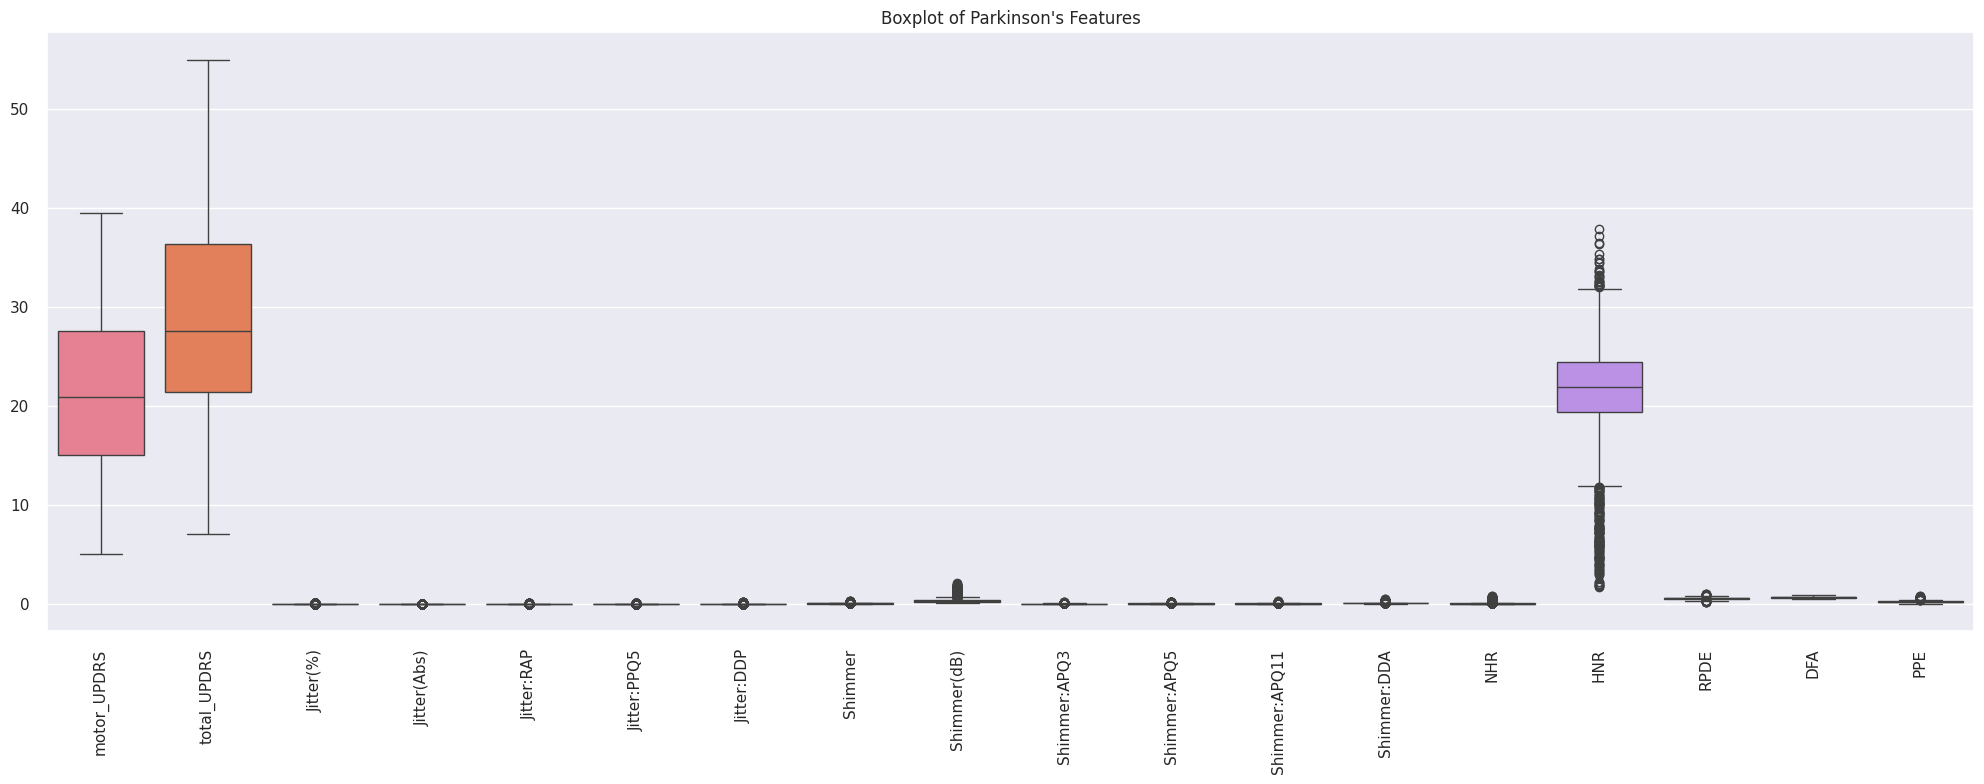

In [52]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=X)
plt.xticks(rotation=90)
plt.title("Boxplot of Parkinson's Features")
plt.tight_layout()
plt.show()


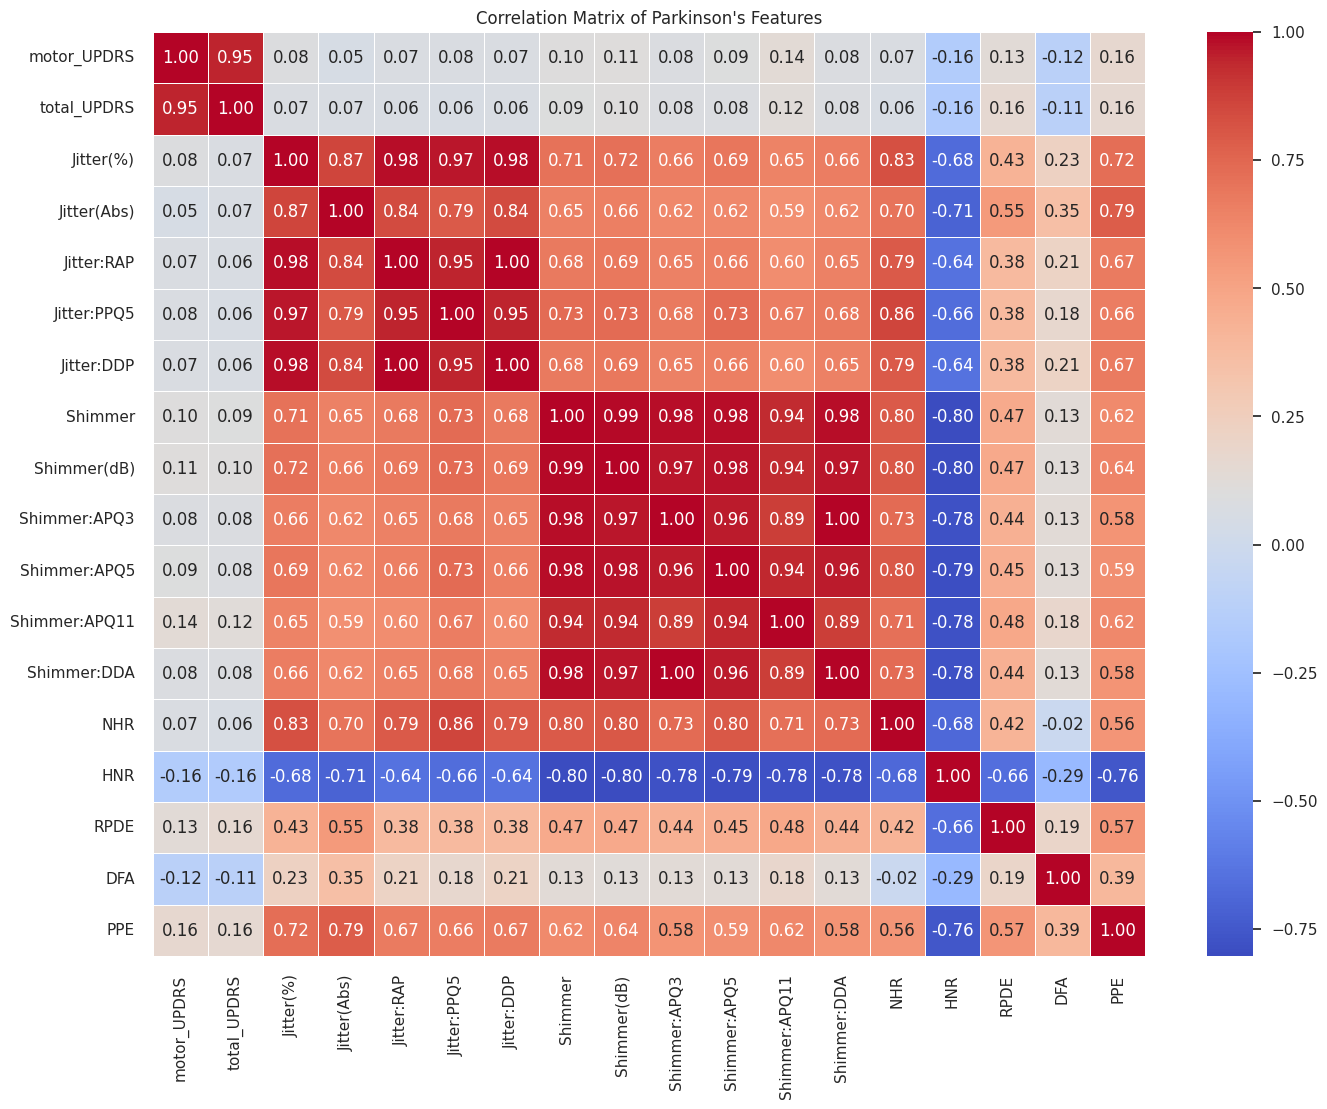

In [53]:
plt.figure(figsize=(16, 12))
sns.heatmap(X.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Parkinson's Features")
plt.show()

In [54]:
# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [55]:
#  PCA Fit (Full)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [56]:
#  PC Coefficient Plot (Styled Biplot)
A = pca.components_[:2].T
plt.figure(figsize=(12, 8))
ax.scatter(A[:, 0], A[:, 1], color="brown", s=100, zorder=2)

for i, feature in enumerate(X.columns):
    ax.annotate(
        feature, xy=(A[i, 0], A[i, 1]), xytext=(5, 5),
        textcoords="offset points", fontsize=11, color="black",
        bbox=dict(boxstyle="round,pad=0.3", fc="yellow", ec="none", alpha=0.8),
        arrowprops=dict(arrowstyle="->", color='gray', lw=0.8),
        zorder=3
    )

ax.axhline(0, color='gray', linestyle='--')
ax.axvline(0, color='gray', linestyle='--')
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("PC Coefficient Plot (Styled)")
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

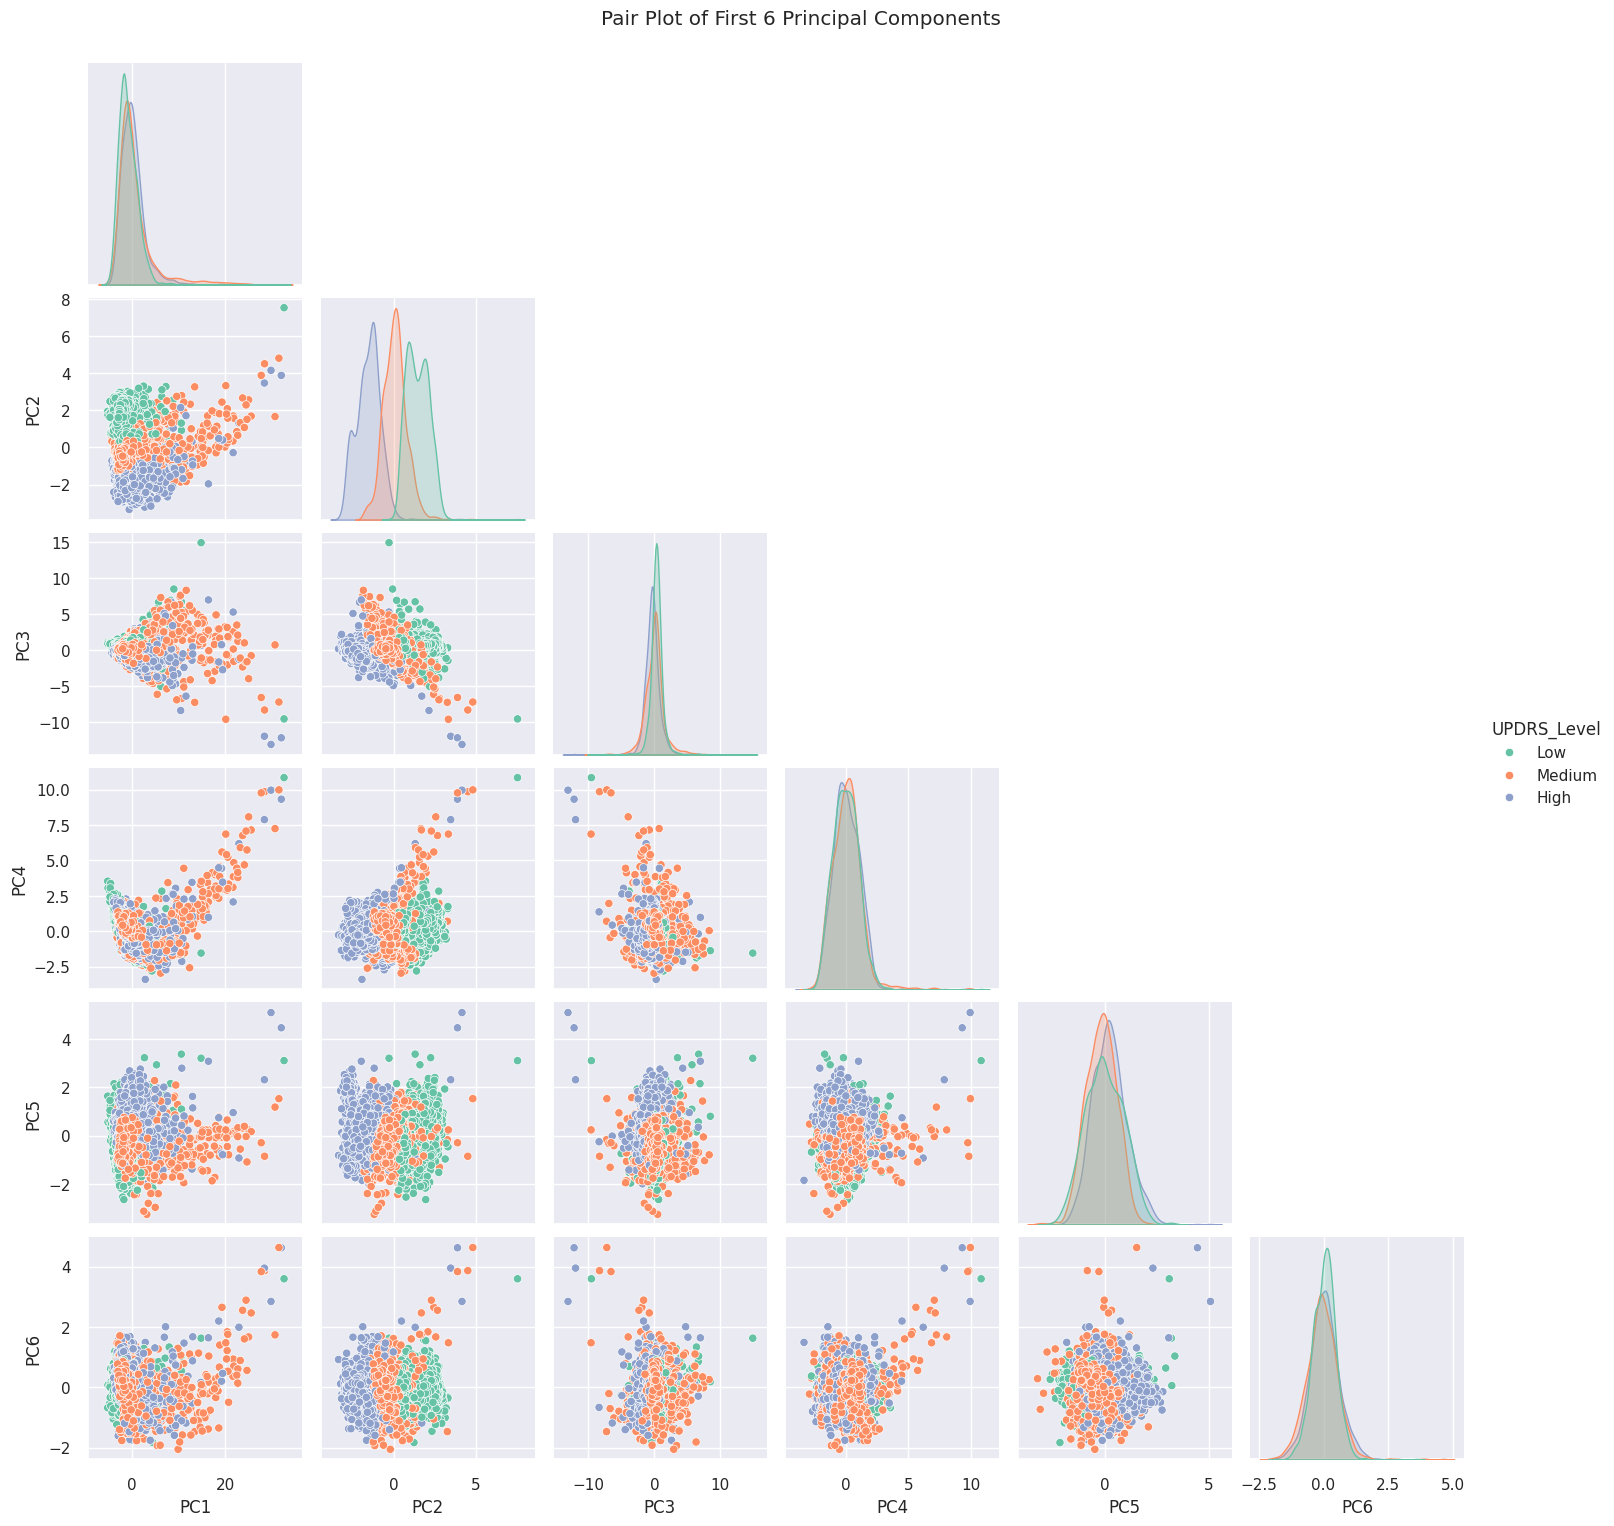

In [57]:
#  Pair Plot of First 6 PCs
pca_df = pd.DataFrame(X_pca[:, :6], columns=[f"PC{i+1}" for i in range(6)])
pca_df["UPDRS_Level"] = pd.qcut(df["motor_UPDRS"], q=3, labels=["Low", "Medium", "High"])
sns.pairplot(pca_df, hue="UPDRS_Level", palette="Set2", diag_kind="kde", corner=True)
plt.suptitle("Pair Plot of First 6 Principal Components", y=1.02)
plt.show()

In [58]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols


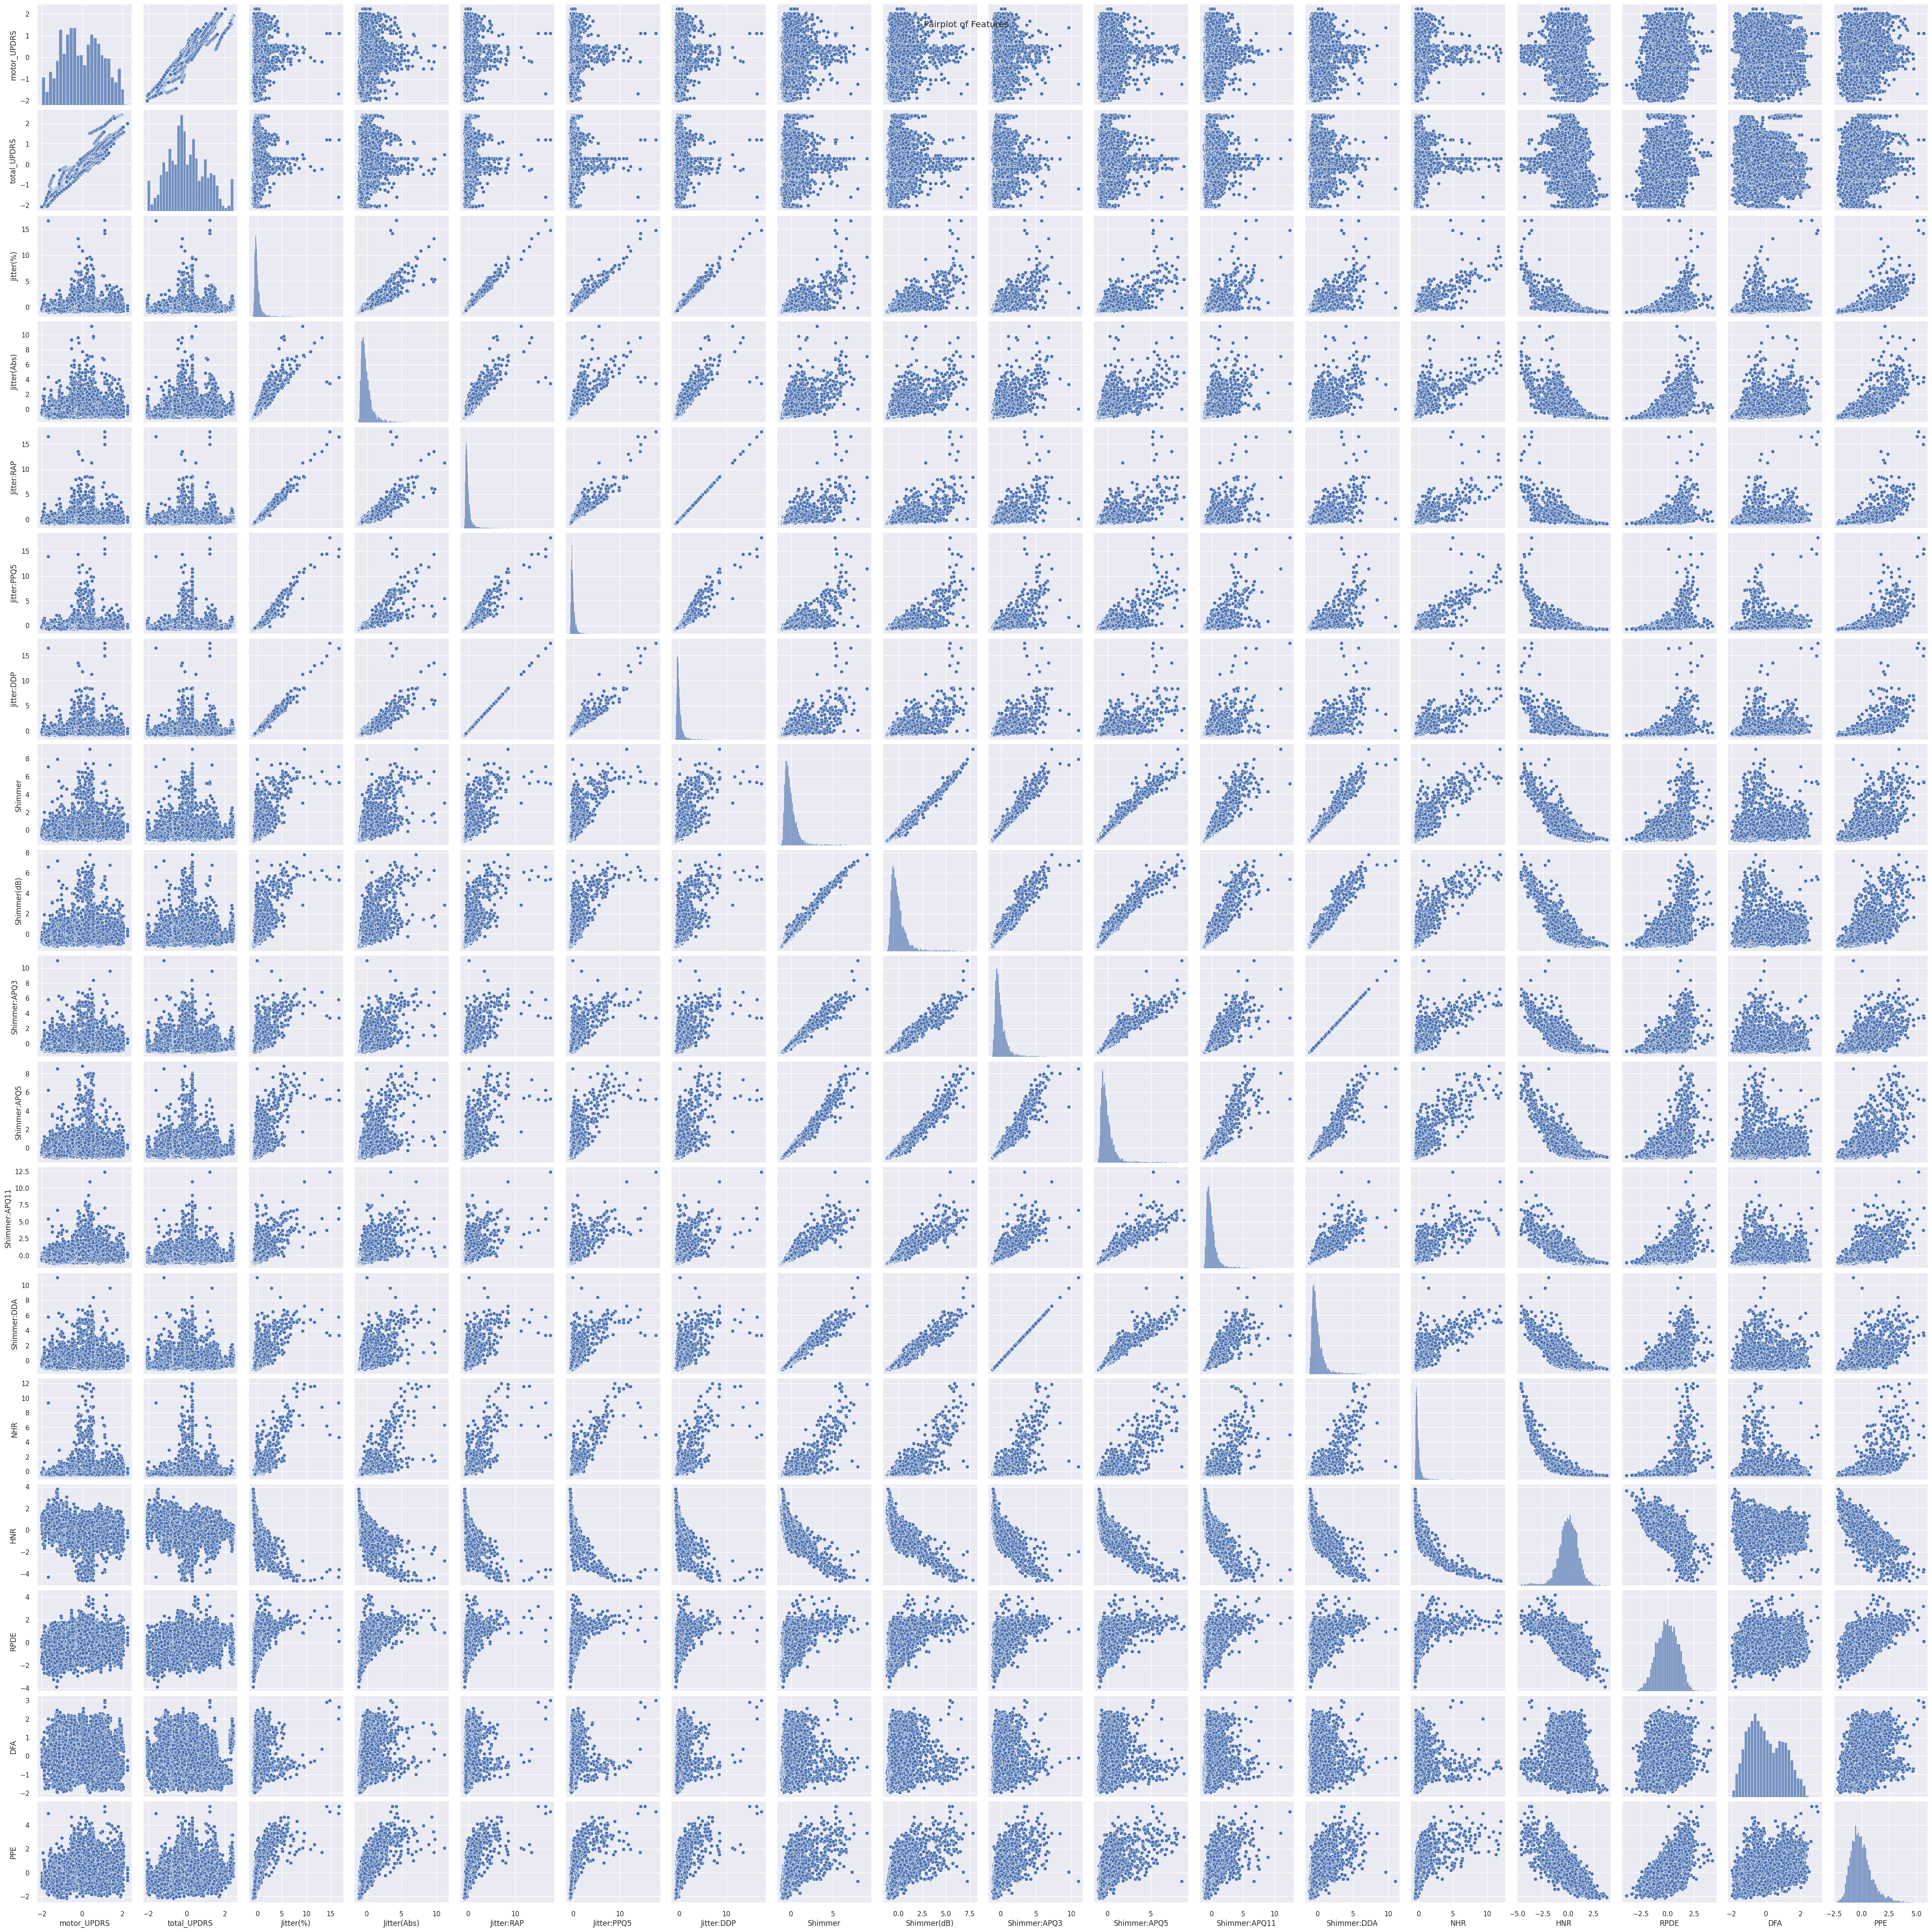

In [59]:
sns.pairplot(X)
plt.suptitle('Pairplot of Features')
plt.show()


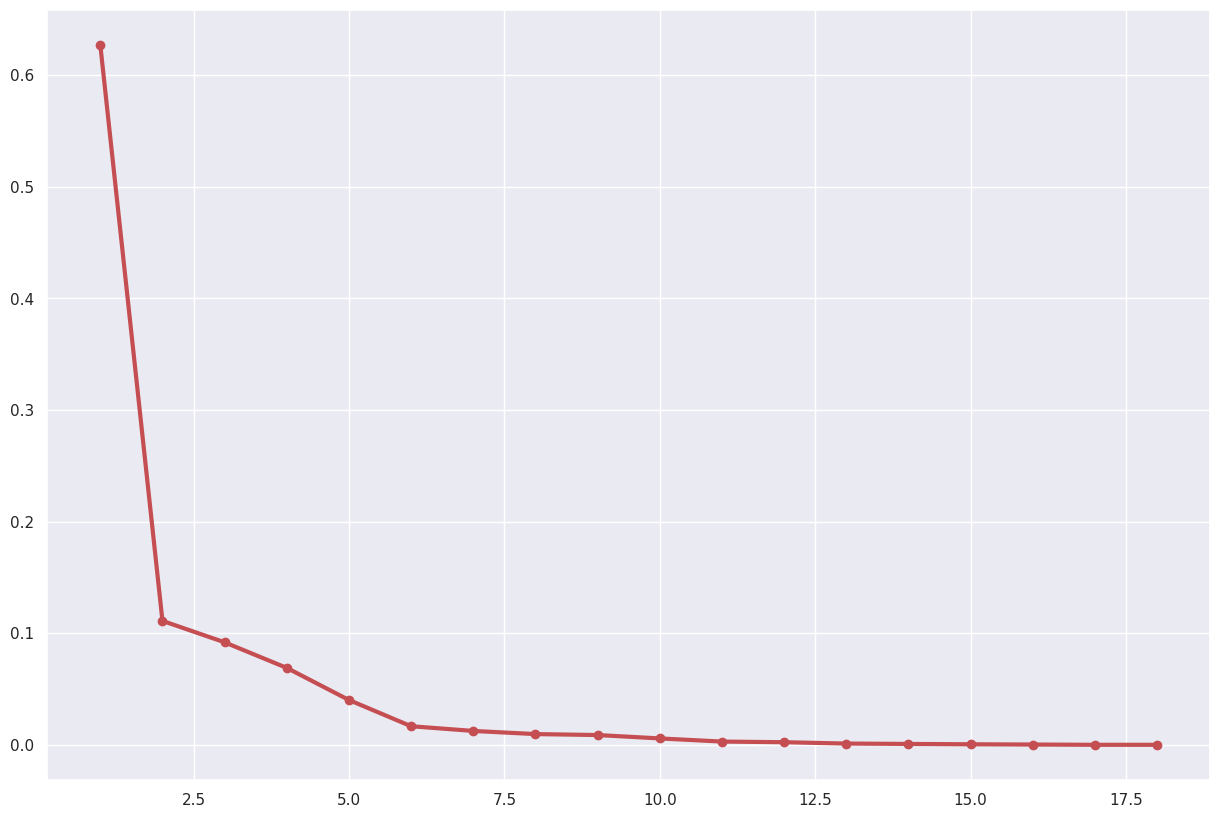

In [ ]:
#eigenvalues

Lambda = pca.explained_variance_

x = np.arange(len(Lambda)) + 1

plt.figure(figsize=(15,10))
plt.plot(x, Lambda/sum(Lambda), 'ro-', lw=3)
plt.show()

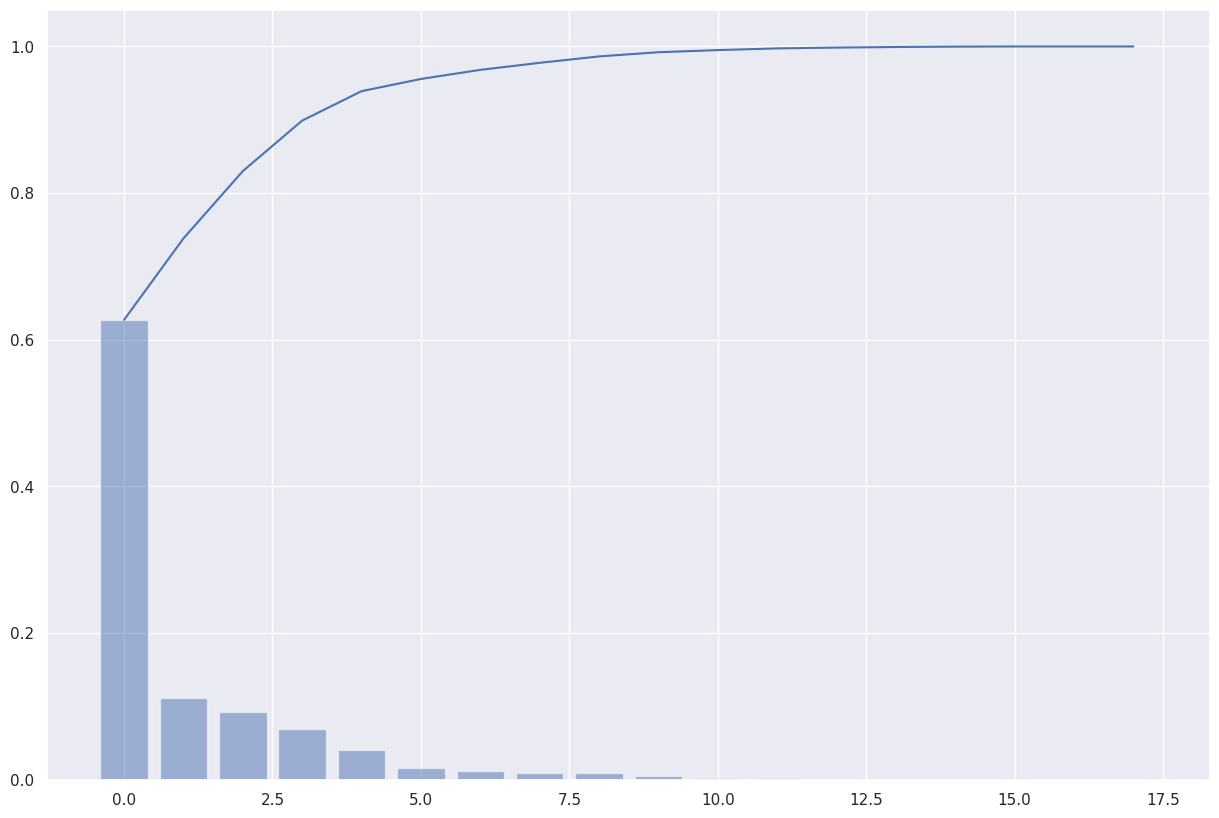

In [ ]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.show()

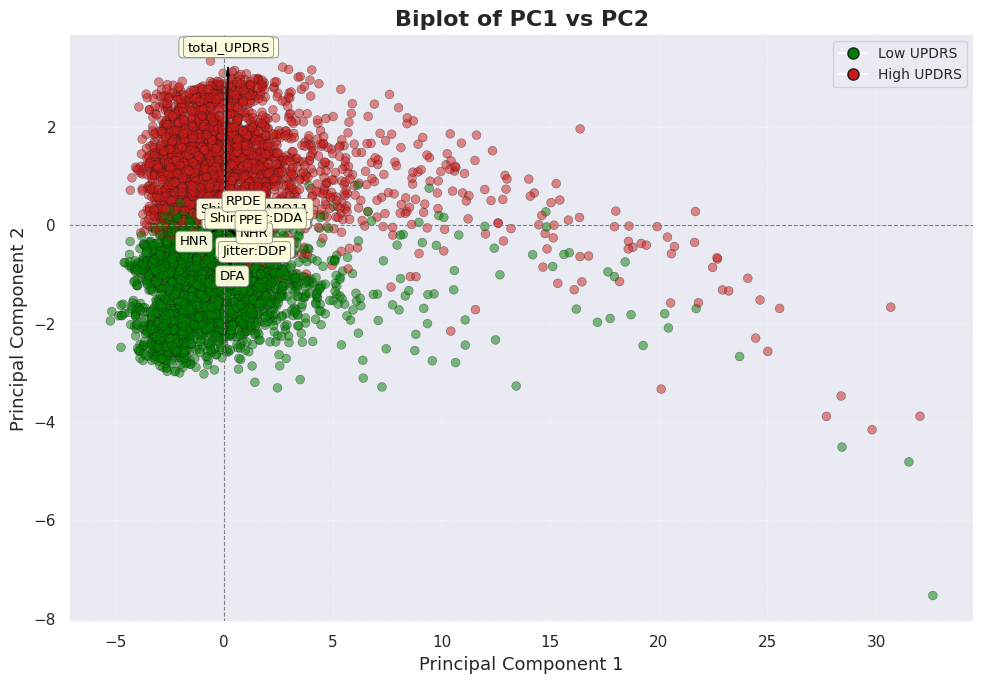

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Prepare data
Z = X_pca[:, :2]                      # Projected data (PC1 & PC2)
A = pca.components_[:2].T             # Loadings (feature vectors)
labels = pd.qcut(df["motor_UPDRS"], q=2, labels=["Low", "High"])
colors = labels.map({"Low": "#008000", "High": "#CD1C18"})
# Create high-quality biplot
plt.figure(figsize=(10, 7))
plt.title("Biplot of PC1 vs PC2", fontsize=16, fontweight='bold')
plt.xlabel("Principal Component 1", fontsize=13)
plt.ylabel("Principal Component 2", fontsize=13)

# Plot PCA-transformed points
plt.scatter(Z[:, 0], Z[:, 1], c=colors, alpha=0.5, s=40, edgecolor='k', linewidth=0.4)

# Plot feature vectors (arrows) with text
for i, feature in enumerate(X.columns):
    plt.arrow(0, 0, A[i, 0]*4.8, A[i, 1]*4.8, color='black', alpha=0.75,
              width=0.015, head_width=0.12, length_includes_head=True)
    plt.text(A[i, 0]*5.4, A[i, 1]*5.4, feature,
             ha='center', va='center', fontsize=9.5, color='black',
             bbox=dict(boxstyle="round,pad=0.3", fc="lightyellow", ec="gray", lw=0.6, alpha=0.95))

# Add zero lines
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)

# Add grid for clarity
plt.grid(True, linestyle=':', linewidth=0.6, alpha=0.7)

# Add legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Low UPDRS',
           markerfacecolor='#008000', markeredgecolor='k', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='High UPDRS',
           markerfacecolor='#CD1C18', markeredgecolor='k', markersize=8)
]
plt.legend(handles=legend_elements, loc='upper right', fontsize=10, frameon=True)

plt.tight_layout()
plt.show()


In [ ]:
model = PCA(n_components=0.8)
out = model.fit_transform(X)

# Access the principal components using integer indices
print(out[:, 0])  # Print the first principal component
print(out[:, 1])  # Print the second principal component
print(out[:, 2])  # Print the third principal component

# Alternatively, convert to a DataFrame for easier access using column names
out_df = pd.DataFrame(out, columns=[f"PC{i+1}" for i in range(out.shape[1])])
print(out_df['PC1'])  # Access using column name


[-0.92414045 -2.54293121 -1.87759036 ... -1.75245968 -2.44329954
 -2.01899406]
[0.95688405 1.16733071 1.24008134 ... 0.47047792 0.50080062 0.46316752]
[ 0.28776325 -0.29394687  0.43229073 ... -0.54617441  0.00155687
 -0.19424936]
0      -0.924140
1      -2.542931
2      -1.877590
3      -0.959486
4      -2.407213
          ...   
5870   -1.463120
5871   -1.932534
5872   -1.752460
5873   -2.443300
5874   -2.018994
Name: PC1, Length: 5875, dtype: float64


In [ ]:
!pip install pycaret

In [ ]:
!pip install numpy==1.23.5 --force-reinstall

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 91.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotly-resampler 0.10.0 requires numpy>=1.24; python_version >= "3.11", but you have numpy 1.23.5 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.1.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
mizani 0.13.3 requires pandas>=2.2.0, but you have pandas 2.1.4 which is incompatible.
xarray 2025.1.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
bigframes 1.42.0 requires numpy>

In [ ]:
from pycaret.classification import*

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7c20d7250040>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: /usr/local/lib/python3.11/dist-packages/numpy.libs/libopenblas64_p-r0-0cf96a72

Processing:  97%|█████████▋| 63/65 [01:18<00:02,  1.31s/it]/usr/local/lib/python3.11/dist-packages/pycaret/internal/pycaret_experiment/supervised_experiment.py:339: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(highlight_cols, subset=["TT (Sec)"])


                                    Model  Accuracy     AUC  Recall   Prec.  \
xgboost         Extreme Gradient Boosting    0.9788  0.9974  0.9788  0.9789   
lightgbm  Light Gradient Boosting Machine    0.9784  0.9978  0.9784  0.9784   
dt               Decision Tree Classifier    0.9560  0.9560  0.9560  0.9562   
rf               Random Forest Classifier    0.9200  0.9756  0.9200  0.9204   
et                 Extra Trees Classifier    0.9078  0.9680  0.9078  0.9088   
gbc          Gradient Boosting Classifier    0.9047  0.9683  0.9047  0.9051   
knn                K Neighbors Classifier    0.8217  0.8998  0.8217  0.8232   
ada                  Ada Boost Classifier    0.8028  0.9008  0.8028  0.8046   
lda          Linear Discriminant Analysis    0.6265  0.6739  0.6265  0.6269   
ridge                    Ridge Classifier    0.6250  0.6733  0.6250  0.6256   
lr                    Logistic Regression    0.6235  0.6791  0.6235  0.6240   
svm                   SVM - Linear Kernel    0.5978 

Processing:  97%|█████████▋| 63/65 [01:05<00:02,  1.49s/it]/usr/local/lib/python3.11/dist-packages/pycaret/internal/pycaret_experiment/supervised_experiment.py:339: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(highlight_cols, subset=["TT (Sec)"])


                                    Model  Accuracy     AUC  Recall   Prec.  \
et                 Extra Trees Classifier    0.8067  0.9000  0.8067  0.8089   
knn                K Neighbors Classifier    0.7940  0.8703  0.7940  0.7955   
rf               Random Forest Classifier    0.7931  0.8801  0.7931  0.7949   
xgboost         Extreme Gradient Boosting    0.7770  0.8660  0.7770  0.7779   
lightgbm  Light Gradient Boosting Machine    0.7736  0.8660  0.7736  0.7752   
gbc          Gradient Boosting Classifier    0.7135  0.7899  0.7135  0.7168   
dt               Decision Tree Classifier    0.7016  0.7016  0.7016  0.7019   
ada                  Ada Boost Classifier    0.6274  0.6710  0.6274  0.6279   
ridge                    Ridge Classifier    0.6014  0.6497  0.6014  0.6019   
lda          Linear Discriminant Analysis    0.6014  0.6497  0.6014  0.6019   
lr                    Logistic Regression    0.5990  0.6496  0.5990  0.5995   
qda       Quadratic Discriminant Analysis    0.5973 

      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.6019  0.6664  0.6019  0.6023  0.6016  0.2039  0.2042
1       0.5995  0.6388  0.5995  0.6004  0.5987  0.1990  0.1999
2       0.5791  0.6425  0.5791  0.5799  0.5782  0.1583  0.1590
3       0.6010  0.6500  0.6010  0.6025  0.5997  0.2022  0.2036
4       0.6253  0.6871  0.6253  0.6258  0.6250  0.2507  0.2511
5       0.6083  0.6476  0.6083  0.6084  0.6081  0.2165  0.2167
6       0.6131  0.6391  0.6131  0.6132  0.6130  0.2262  0.2263
7       0.5742  0.6215  0.5742  0.5744  0.5737  0.1483  0.1486
8       0.5572  0.6201  0.5572  0.5573  0.5568  0.1142  0.1144
9       0.6302  0.6825  0.6302  0.6303  0.6300  0.2603  0.2605
Mean    0.5990  0.6496  0.5990  0.5995  0.5985  0.1980  0.1984
Std     0.0217  0.0217  0.0217  0.0217  0.0219  0.0435  0.0435


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.6019  0.6665  0.6019  0.6023  0.6016  0.2039  0.2042
1       0.5995  0.6386  0.5995  0.6004  0.5987  0.1990  0.1999
2       0.5791  0.6426  0.5791  0.5799  0.5782  0.1583  0.1590
3       0.6010  0.6500  0.6010  0.6025  0.5997  0.2022  0.2036
4       0.6277  0.6871  0.6277  0.6282  0.6275  0.2556  0.2559
5       0.6083  0.6477  0.6083  0.6084  0.6081  0.2165  0.2167
6       0.6156  0.6392  0.6156  0.6156  0.6155  0.2311  0.2312
7       0.5742  0.6216  0.5742  0.5744  0.5737  0.1483  0.1486
8       0.5572  0.6201  0.5572  0.5573  0.5568  0.1142  0.1144
9       0.6302  0.6824  0.6302  0.6303  0.6300  0.2603  0.2605
Mean    0.5995  0.6496  0.5995  0.5999  0.5990  0.1989  0.1994
Std     0.0222  0.0217  0.0222  0.0222  0.0223  0.0444  0.0444


      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.8131  0.8873  0.8131  0.8132  0.8131  0.6262  0.6263
1       0.7549  0.8355  0.7549  0.7566  0.7544  0.5097  0.5115
2       0.8151  0.8863  0.8151  0.8152  0.8151  0.6302  0.6303
3       0.7932  0.8820  0.7932  0.7957  0.7927  0.5863  0.5888
4       0.7762  0.8578  0.7762  0.7774  0.7759  0.5522  0.5535
5       0.7859  0.8700  0.7859  0.7861  0.7859  0.5718  0.5720
6       0.8005  0.8620  0.8005  0.8034  0.8000  0.6011  0.6039
7       0.8054  0.8790  0.8054  0.8078  0.8050  0.6108  0.6131
8       0.8127  0.8742  0.8127  0.8154  0.8123  0.6254  0.6281
9       0.7835  0.8685  0.7835  0.7840  0.7833  0.5669  0.5674
Mean    0.7940  0.8703  0.7940  0.7955  0.7938  0.5880  0.5895
Std     0.0183  0.0149  0.0183  0.0184  0.0184  0.0367  0.0367


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.8107  0.9052  0.8107  0.8108  0.8107  0.6214  0.6215
1       0.7524  0.8435  0.7524  0.7536  0.7521  0.5049  0.5060
2       0.8151  0.9005  0.8151  0.8153  0.8150  0.6301  0.6304
3       0.8054  0.8901  0.8054  0.8072  0.8050  0.6106  0.6125
4       0.7713  0.8631  0.7713  0.7725  0.7710  0.5425  0.5438
5       0.7956  0.8706  0.7956  0.7979  0.7952  0.5913  0.5936
6       0.8054  0.8808  0.8054  0.8056  0.8053  0.6107  0.6110
7       0.8102  0.8926  0.8102  0.8121  0.8099  0.6205  0.6224
8       0.8200  0.8824  0.8200  0.8219  0.8197  0.6400  0.6419
9       0.8005  0.8779  0.8005  0.8005  0.8005  0.6010  0.6010
Mean    0.7986  0.8806  0.7986  0.7998  0.7985  0.5973  0.5984
Std     0.0200  0.0174  0.0200  0.0199  0.0200  0.0400  0.0399


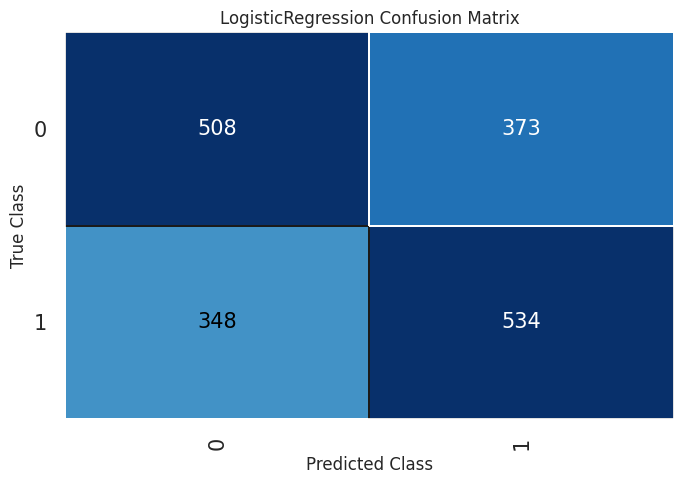

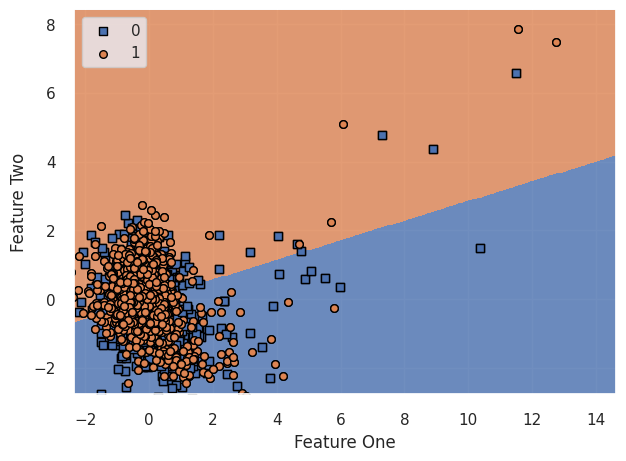

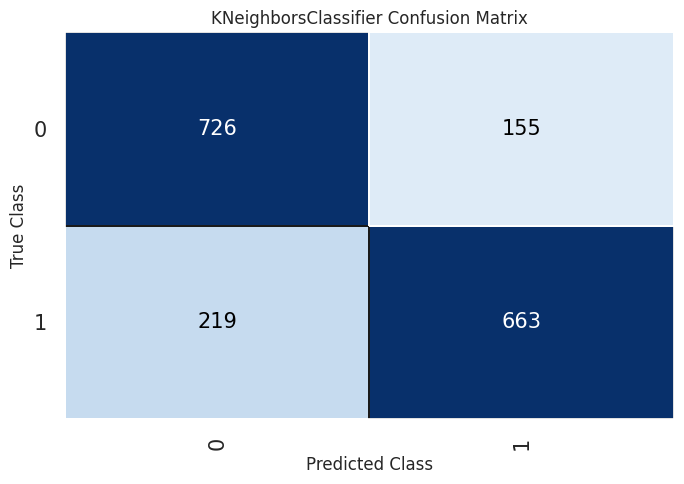

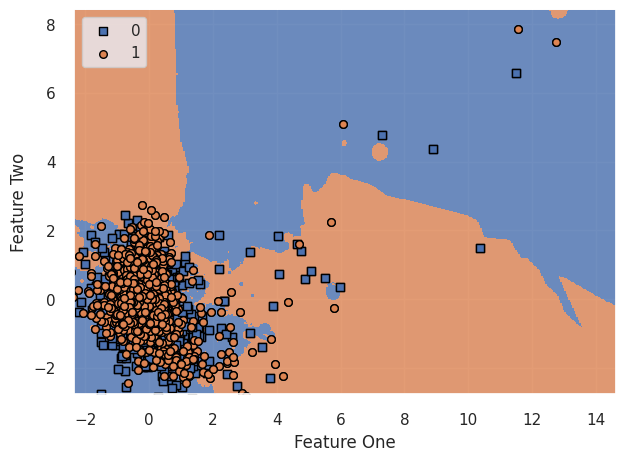

In [63]:
# 1. Import Required Libraries
from pycaret.classification import *
import pandas as pd

# 2. Load Dataset
df = pd.read_csv("parkinsons_updrs.csv")

# 3. Binarize Target (motor_UPDRS -> Low/High Severity)
df["severity"] = pd.qcut(df["motor_UPDRS"], q=2, labels=["Low", "High"])

# 4. Drop Metadata and Rename Target
df = df.drop(columns=["subject#", "motor_UPDRS", "total_UPDRS", "sex"])
df = df.rename(columns={"severity": "Target"})

# 5. Setup PyCaret Without PCA
s1 = setup(df,
           target='Target',
           session_id=123,
           normalize=True,
           verbose=False,
           html=False)

# 6. Compare Models Before PCA
best_before_pca = compare_models(sort='F1')


# 7. Setup PyCaret With PCA
s2 = setup(df,
           target='Target',
           session_id=123,
           normalize=True,
           pca=True,
           pca_components=0.95,
           verbose=False,
           html=False)

# 8. Compare Models After PCA
best_after_pca = compare_models(sort='F1')


# 9. Logistic Regression
lr = create_model('lr')
tuned_lr = tune_model(lr, optimize='F1')

# 10. K-Nearest Neighbors
knn = create_model('knn')
tuned_knn = tune_model(knn, optimize='F1')


# Logistic Regression (Default colors
plot_model(tuned_lr, plot='confusion_matrix', plot_kwargs={'cmap': 'Blues'})
plot_model(tuned_lr, plot='boundary')

# K-Nearest Neighbors
plot_model(tuned_knn, plot='confusion_matrix', plot_kwargs={'cmap': 'Blues'})
plot_model(tuned_knn, plot='boundary')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("parkinsons_updrs.csv")
df["Target"] = pd.qcut(df["motor_UPDRS"], q=2, labels=["Low", "High"])
df = df.drop(columns=["subject#", "motor_UPDRS", "total_UPDRS", "sex"])

X = df.drop('Target', axis=1)
y = df['Target']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA (retain 95% variance)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_pca, y_train)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_pca, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
from pycaret.classification import *
import pandas as pd
from tabulate import tabulate

# Load and prepare data
df = pd.read_csv("parkinsons_updrs.csv")
df["severity"] = pd.qcut(df["motor_UPDRS"], q=2, labels=["Low", "High"])
df = df.drop(columns=["subject#", "motor_UPDRS", "total_UPDRS", "sex"])
df = df.rename(columns={"severity": "Target"})

# Setup PyCaret WITHOUT PCA
s1 = setup(df, target='Target', session_id=123, normalize=True, verbose=False, html=False)

# Compare models
best_model = compare_models(sort='F1')

# Save table
results_before = pull()

# Print it in beautiful format like the reference image
print(tabulate(results_before, headers='keys', tablefmt='fancy_grid', showindex=False))

# Optionally save for report
results_before.to_csv("Models Cmparision results Before Applying PCA.csv", index=False)


Processing:  97%|█████████▋| 63/65 [01:16<00:02,  1.06s/it]/usr/local/lib/python3.11/dist-packages/pycaret/internal/pycaret_experiment/supervised_experiment.py:339: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(highlight_cols, subset=["TT (Sec)"])
                                                           

                                    Model  Accuracy     AUC  Recall   Prec.  \
xgboost         Extreme Gradient Boosting    0.9788  0.9974  0.9788  0.9789   
lightgbm  Light Gradient Boosting Machine    0.9784  0.9978  0.9784  0.9784   
dt               Decision Tree Classifier    0.9560  0.9560  0.9560  0.9562   
rf               Random Forest Classifier    0.9200  0.9756  0.9200  0.9204   
et                 Extra Trees Classifier    0.9078  0.9680  0.9078  0.9088   
gbc          Gradient Boosting Classifier    0.9047  0.9683  0.9047  0.9051   
knn                K Neighbors Classifier    0.8217  0.8998  0.8217  0.8232   
ada                  Ada Boost Classifier    0.8028  0.9008  0.8028  0.8046   
lda          Linear Discriminant Analysis    0.6265  0.6739  0.6265  0.6269   
ridge                    Ridge Classifier    0.6250  0.6733  0.6250  0.6256   
lr                    Logistic Regression    0.6235  0.6791  0.6235  0.6240   
svm                   SVM - Linear Kernel    0.5978 

In [ ]:
from pycaret.classification import *
import pandas as pd
from tabulate import tabulate

# Reload and prepare dataset
df = pd.read_csv("parkinsons_updrs.csv")
df["severity"] = pd.qcut(df["motor_UPDRS"], q=2, labels=["Low", "High"])
df = df.drop(columns=["subject#", "motor_UPDRS", "total_UPDRS", "sex"])
df = df.rename(columns={"severity": "Target"})

# Setup environment WITH PCA
s2 = setup(df, target='Target', session_id=123,
           normalize=True, pca=True, pca_components=0.95,
           verbose=False, html=False)

# Compare models after PCA
best_model_after_pca = compare_models(sort='F1')

# Pull the metrics table
results_after = pull()

# Display clearly using tabulate
print("Models Cmparision results After Applying PCA")
print(tabulate(results_after, headers='keys', tablefmt='fancy_grid', showindex=False))

# Optionally export
results_after.to_csv("Models Cmparision results After Applying PCA.csv", index=False)


Processing:  97%|█████████▋| 63/65 [00:54<00:01,  1.12it/s]/usr/local/lib/python3.11/dist-packages/pycaret/internal/pycaret_experiment/supervised_experiment.py:339: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(highlight_cols, subset=["TT (Sec)"])
                                                           

                                    Model  Accuracy     AUC  Recall   Prec.  \
et                 Extra Trees Classifier    0.8067  0.9000  0.8067  0.8089   
knn                K Neighbors Classifier    0.7940  0.8703  0.7940  0.7955   
rf               Random Forest Classifier    0.7931  0.8801  0.7931  0.7949   
xgboost         Extreme Gradient Boosting    0.7770  0.8660  0.7770  0.7779   
lightgbm  Light Gradient Boosting Machine    0.7736  0.8660  0.7736  0.7752   
gbc          Gradient Boosting Classifier    0.7135  0.7899  0.7135  0.7168   
dt               Decision Tree Classifier    0.7016  0.7016  0.7016  0.7019   
ada                  Ada Boost Classifier    0.6274  0.6710  0.6274  0.6279   
ridge                    Ridge Classifier    0.6014  0.6497  0.6014  0.6019   
lda          Linear Discriminant Analysis    0.6014  0.6497  0.6014  0.6019   
lr                    Logistic Regression    0.5990  0.6496  0.5990  0.5995   
qda       Quadratic Discriminant Analysis    0.5973 

      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.6019  0.6664  0.6019  0.6023  0.6016  0.2039  0.2042
1       0.5995  0.6388  0.5995  0.6004  0.5987  0.1990  0.1999
2       0.5791  0.6425  0.5791  0.5799  0.5782  0.1583  0.1590
3       0.6010  0.6500  0.6010  0.6025  0.5997  0.2022  0.2036
4       0.6253  0.6871  0.6253  0.6258  0.6250  0.2507  0.2511
5       0.6083  0.6476  0.6083  0.6084  0.6081  0.2165  0.2167
6       0.6131  0.6391  0.6131  0.6132  0.6130  0.2262  0.2263
7       0.5742  0.6215  0.5742  0.5744  0.5737  0.1483  0.1486
8       0.5572  0.6201  0.5572  0.5573  0.5568  0.1142  0.1144
9       0.6302  0.6825  0.6302  0.6303  0.6300  0.2603  0.2605
Mean    0.5990  0.6496  0.5990  0.5995  0.5985  0.1980  0.1984
Std     0.0217  0.0217  0.0217  0.0217  0.0219  0.0435  0.0435


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.6019  0.6665  0.6019  0.6023  0.6016  0.2039  0.2042
1       0.5995  0.6386  0.5995  0.6004  0.5987  0.1990  0.1999
2       0.5791  0.6426  0.5791  0.5799  0.5782  0.1583  0.1590
3       0.6010  0.6500  0.6010  0.6025  0.5997  0.2022  0.2036
4       0.6277  0.6871  0.6277  0.6282  0.6275  0.2556  0.2559
5       0.6083  0.6477  0.6083  0.6084  0.6081  0.2165  0.2167
6       0.6156  0.6392  0.6156  0.6156  0.6155  0.2311  0.2312
7       0.5742  0.6216  0.5742  0.5744  0.5737  0.1483  0.1486
8       0.5572  0.6201  0.5572  0.5573  0.5568  0.1142  0.1144
9       0.6302  0.6824  0.6302  0.6303  0.6300  0.2603  0.2605
Mean    0.5995  0.6496  0.5995  0.5999  0.5990  0.1989  0.1994
Std     0.0222  0.0217  0.0222  0.0222  0.0223  0.0444  0.0444


      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.8131  0.8873  0.8131  0.8132  0.8131  0.6262  0.6263
1       0.7549  0.8355  0.7549  0.7566  0.7544  0.5097  0.5115
2       0.8151  0.8863  0.8151  0.8152  0.8151  0.6302  0.6303
3       0.7932  0.8820  0.7932  0.7957  0.7927  0.5863  0.5888
4       0.7762  0.8578  0.7762  0.7774  0.7759  0.5522  0.5535
5       0.7859  0.8700  0.7859  0.7861  0.7859  0.5718  0.5720
6       0.8005  0.8620  0.8005  0.8034  0.8000  0.6011  0.6039
7       0.8054  0.8790  0.8054  0.8078  0.8050  0.6108  0.6131
8       0.8127  0.8742  0.8127  0.8154  0.8123  0.6254  0.6281
9       0.7835  0.8685  0.7835  0.7840  0.7833  0.5669  0.5674
Mean    0.7940  0.8703  0.7940  0.7955  0.7938  0.5880  0.5895
Std     0.0183  0.0149  0.0183  0.0184  0.0184  0.0367  0.0367


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.8107  0.9052  0.8107  0.8108  0.8107  0.6214  0.6215
1       0.7524  0.8435  0.7524  0.7536  0.7521  0.5049  0.5060
2       0.8151  0.9005  0.8151  0.8153  0.8150  0.6301  0.6304
3       0.8054  0.8901  0.8054  0.8072  0.8050  0.6106  0.6125
4       0.7713  0.8631  0.7713  0.7725  0.7710  0.5425  0.5438
5       0.7956  0.8706  0.7956  0.7979  0.7952  0.5913  0.5936
6       0.8054  0.8808  0.8054  0.8056  0.8053  0.6107  0.6110
7       0.8102  0.8926  0.8102  0.8121  0.8099  0.6205  0.6224
8       0.8200  0.8824  0.8200  0.8219  0.8197  0.6400  0.6419
9       0.8005  0.8779  0.8005  0.8005  0.8005  0.6010  0.6010
Mean    0.7986  0.8806  0.7986  0.7998  0.7985  0.5973  0.5984
Std     0.0200  0.0174  0.0200  0.0199  0.0200  0.0400  0.0399

Tuned Logistic Regression:
+----------+--------+--------+--------+--------+--------+--------+
| Accuracy |  AUC   | R

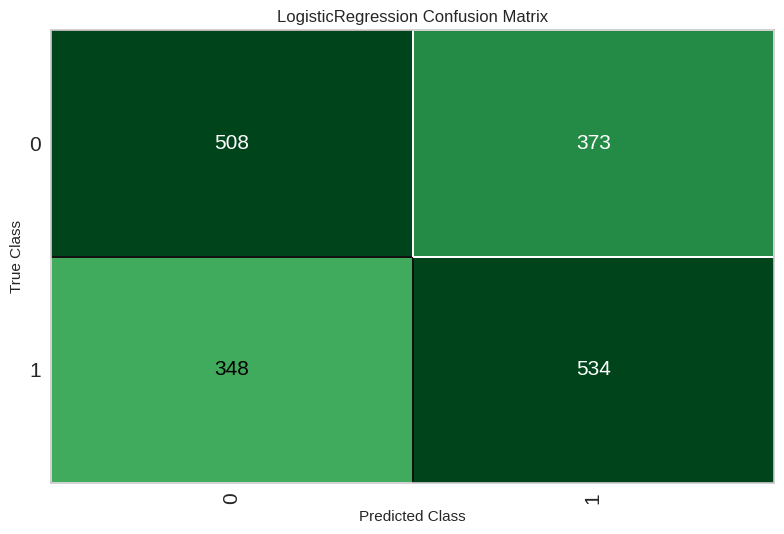

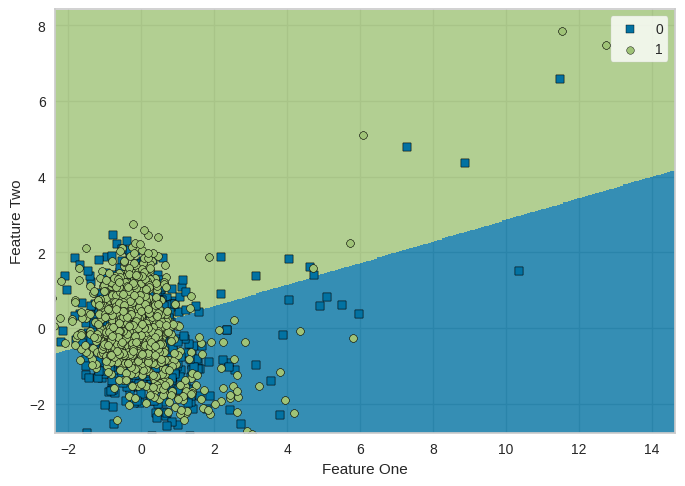

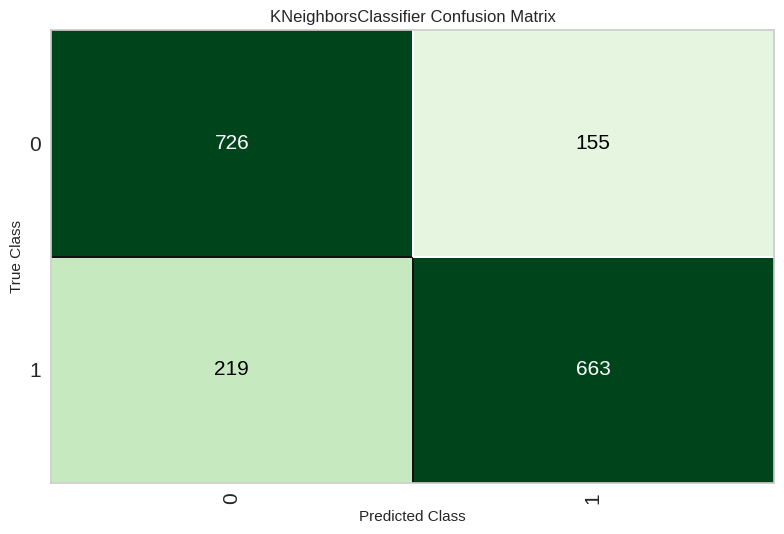

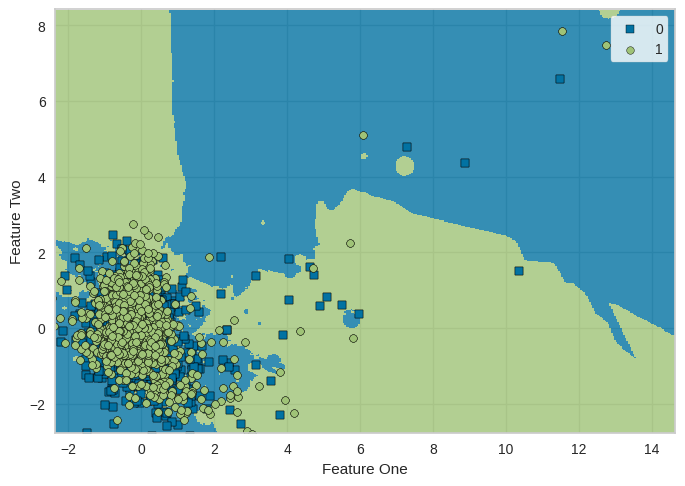

In [ ]:

# Logistic Regression
lr = create_model('lr')
tuned_lr = tune_model(lr, optimize='F1')

# K-Nearest Neighbors
knn = create_model('knn')
tuned_knn = tune_model(knn, optimize='F1')

print("\nTuned Logistic Regression:")
print(tabulate(pull(), headers='keys', tablefmt='pretty', showindex=False))

# Repeat for KNN
print("\nTuned KNN Regression:")
print(tabulate(pull(), headers='keys', tablefmt='pretty', showindex=False))

# Logistic Regression
plot_model(tuned_lr, plot='confusion_matrix')
plot_model(tuned_lr, plot='boundary')

# KNN
plot_model(tuned_knn, plot='confusion_matrix')
plot_model(tuned_knn, plot='boundary')





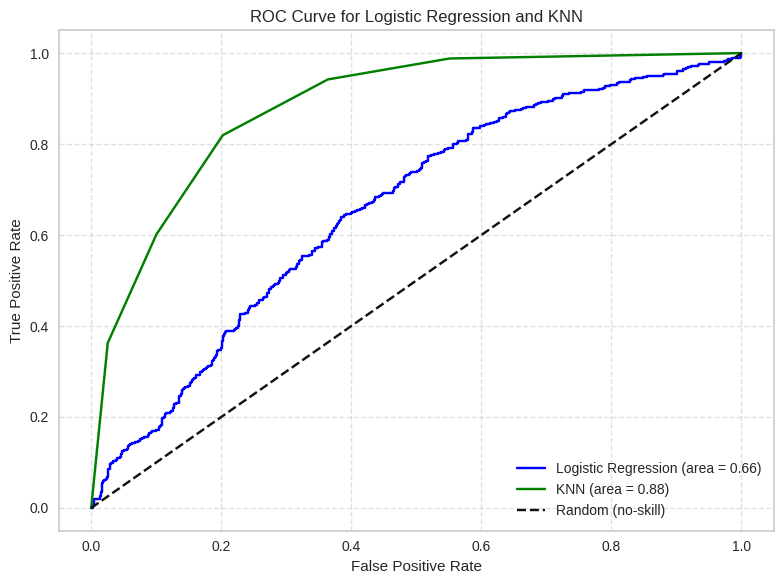

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load and prepare data
df = pd.read_csv("parkinsons_updrs.csv")
df["Target"] = pd.qcut(df["motor_UPDRS"], q=2, labels=[0, 1])  # binary classification
df = df.drop(columns=["subject#", "motor_UPDRS", "total_UPDRS", "sex"])

X = df.drop("Target", axis=1)
y = df["Target"]

# Split and standardize
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA (retain 95% variance)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train models
lr_model = LogisticRegression(max_iter=1000, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)

lr_model.fit(X_train_pca, y_train)
knn_model.fit(X_train_pca, y_train)

# Predict probabilities
lr_probs = lr_model.predict_proba(X_test_pca)[:, 1]
knn_probs = knn_model.predict_proba(X_test_pca)[:, 1]

# ROC computation
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_probs)
auc_lr = auc(fpr_lr, tpr_lr)
auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (area = {auc_lr:.2f})", color='blue')
plt.plot(fpr_knn, tpr_knn, label=f"KNN (area = {auc_knn:.2f})", color='green')
plt.plot([0, 1], [0, 1], 'k--', label="Random (no-skill)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression and KNN")
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
